In [1]:
# 4)
# d) Média salarial por raça/cor.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb

In [3]:
sb.set(style="whitegrid")

In [4]:
#lista de todos os arquivos
caged_files = sorted(glob('..\DadosCaged\CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [6]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['..\\DadosCaged\\CAGEDMOV202001.txt',
 '..\\DadosCaged\\CAGEDMOV202002.txt',
 '..\\DadosCaged\\CAGEDMOV202003.txt',
 '..\\DadosCaged\\CAGEDMOV202004.txt',
 '..\\DadosCaged\\CAGEDMOV202005.txt',
 '..\\DadosCaged\\CAGEDMOV202006.txt',
 '..\\DadosCaged\\CAGEDMOV202007.txt',
 '..\\DadosCaged\\CAGEDMOV202008.txt',
 '..\\DadosCaged\\CAGEDMOV202009.txt',
 '..\\DadosCaged\\CAGEDMOV202010.txt',
 '..\\DadosCaged\\CAGEDMOV202011.txt',
 '..\\DadosCaged\\CAGEDMOV202012.txt',
 '..\\DadosCaged\\CAGEDMOV202101.txt',
 '..\\DadosCaged\\CAGEDMOV202102.txt',
 '..\\DadosCaged\\CAGEDMOV202103.txt']

In [7]:
#Lista as colunas do dataframe
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [9]:
main_df['Raça'] = main_df['raçacor'].map({
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indigena',
6:'Nao Informada',
9:'Nao Identificado'})

In [10]:
main_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte,Raça
39694383,202103,3,35,355030,A,151201,1,724315,102,7,...,3,10,0,0,0,1500.000000,99,0,1,Branca
39694384,202103,3,35,355030,I,5620101,1,513205,111,7,...,1,20,0,1,0,6567.000000,7,0,1,Preta
39694385,202103,2,25,251370,C,1532700,-1,764105,101,7,...,1,31,0,0,0,1122.000000,10,0,1,Branca
39694386,202103,3,33,330455,I,5510801,-1,513505,101,6,...,1,31,0,0,0,1021.419983,5,0,1,Branca
39694387,202103,3,35,354980,G,4530701,-1,142105,101,9,...,1,31,0,0,0,4500.000000,4,0,1,Branca


In [56]:
raca_salario_df = main_df[["Raça", "salário"]]
raca_salario_df = raca_salario_df.groupby(['Raça'], as_index = False).mean()
raca_salario_df['salário'] = raca_salario_df['salário'].round(2)

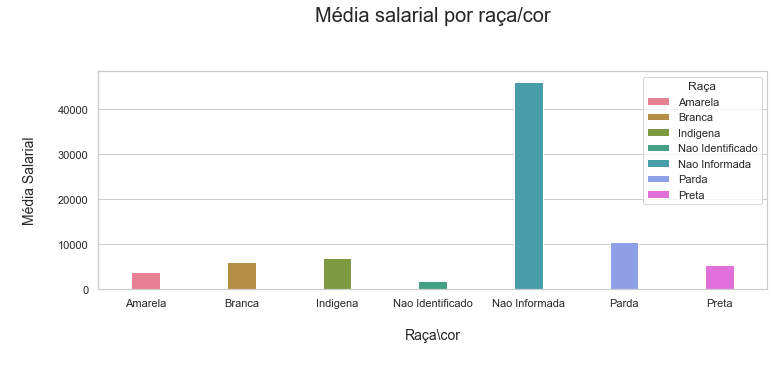

In [62]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sb.barplot(x=raca_salario_df['Raça'], 
                y=raca_salario_df['salário'], 
                data=raca_salario_df, 
                dodge=False, 
                palette='husl',
                hue=raca_salario_df['Raça'])
ax.set_title("Média salarial por raça/cor\n\n", fontsize = 20)
ax.set_xlabel("\nRaça\cor\n", fontsize = 14)
ax.set_ylabel("\nMédia Salarial\n", fontsize = 14)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .30)

In [63]:
raca_salario_df

,Raça,salário
0,Amarela,3762.17
1,Branca,6007.25
2,Indigena,6905.74
3,Nao Identificado,1768.26
4,Nao Informada,46166.65
5,Parda,10399.72
6,Preta,5233.70
